In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.special import comb
from itertools import combinations, permutations
from apyori import apriori as apr
from mlxtend.frequent_patterns import apriori, association_rules
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder

In [2]:
df = pd.read_csv("book.csv")

In [3]:
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
df1 = df.copy()

In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ChildBks,2000.0,0.4230,0.494159,0.0,0.0,0.0,1.0,1.0
YouthBks,2000.0,0.2475,0.431668,0.0,0.0,0.0,0.0,1.0
CookBks,2000.0,0.4310,0.495340,0.0,0.0,0.0,1.0,1.0
DoItYBks,2000.0,0.2820,0.450086,0.0,0.0,0.0,1.0,1.0
RefBks,2000.0,0.2145,0.410578,0.0,0.0,0.0,0.0,1.0
ArtBks,2000.0,0.2410,0.427797,0.0,0.0,0.0,0.0,1.0
GeogBks,2000.0,0.2760,0.447129,0.0,0.0,0.0,1.0,1.0
ItalCook,2000.0,0.1135,0.317282,0.0,0.0,0.0,0.0,1.0
ItalAtlas,2000.0,0.0370,0.188809,0.0,0.0,0.0,0.0,1.0
ItalArt,2000.0,0.0485,0.214874,0.0,0.0,0.0,0.0,1.0


In [6]:
df1.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [7]:
df1.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [8]:
df1.shape

(2000, 11)

In [9]:
item_sets = {}

In [10]:
te = TransactionEncoder()

In [11]:
te_ary = te.fit(df1).transform(df1)

In [12]:
te_ary = te.fit(df1).transform(df1)

In [13]:
ap = pd.DataFrame(te_ary, columns=te.columns_)

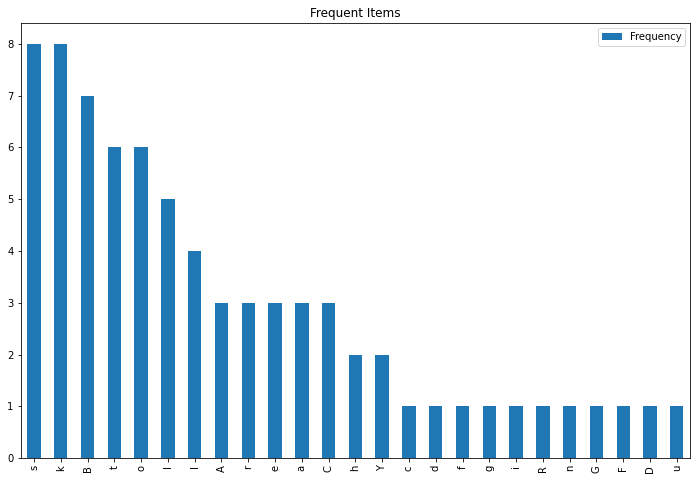

In [14]:
ap.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar',
                                                                                  figsize=(12,8),
                                                                                  title="Frequent Items")
plt.show()

In [15]:
ap_0_5 = {}
ap_1 = {}
ap_5 = {}
ap_1_0 = {}

In [16]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [17]:
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(df1,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)

In [18]:
confs = []

In [19]:
for i in [0.001,0.005,0.01,0.05,0.1]:
    ap_i = gen_rules(ap,confidence=confidence,support=i)
    confs.append(ap_i)   

C:\Users\Admin\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types re

In [28]:
all_conf = pd.concat(confs,axis=1)

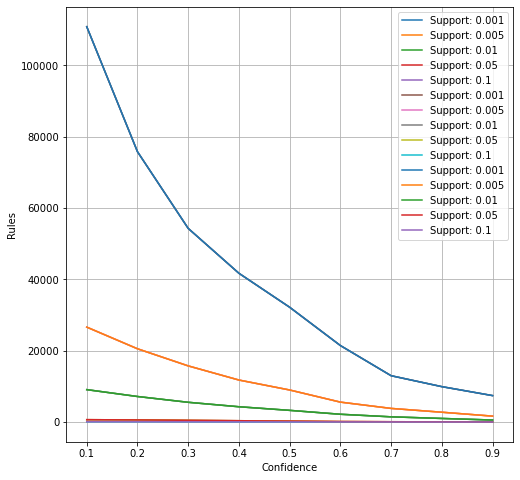

In [29]:
all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

In [30]:
#According to the graph : Lower the confidence level, Higher the number of rules
#Higher the support, Lower the number of rules

In [31]:
ap_final =  apriori(ap,0.001,True)

In [32]:
rules_final = association_rules(ap_final,min_threshold=.4,support_only=False)

In [33]:
rules_final[rules_final['confidence'] > 0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(A),(I),0.0015,0.0020,0.001,0.666667,333.333333,0.000997,2.9940
2,(a),(A),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
3,(A),(a),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
5,(A),(l),0.0015,0.0025,0.001,0.666667,266.666667,0.000996,2.9925
6,(A),(r),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
...,...,...,...,...,...,...,...,...,...
739,"(Y, t)","(k, B, s, o)",0.0010,0.0020,0.001,1.000000,500.000000,0.000998,inf
740,"(Y, o)","(k, s, B, t)",0.0010,0.0015,0.001,1.000000,666.666667,0.000999,inf
741,"(Y, s)","(k, B, t, o)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf
744,"(t, o)","(Y, B, s, k)",0.0015,0.0010,0.001,0.666667,666.666667,0.000999,2.9970


In [34]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

Text(0.5, 0, 'lift')

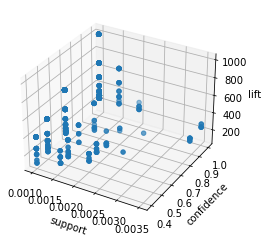

In [35]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

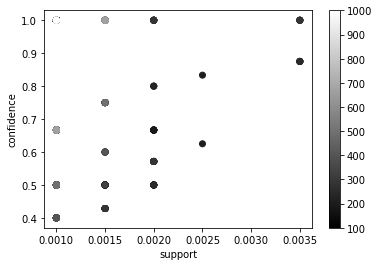

In [36]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")